In [34]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [35]:
import numpy as np
import pandas as pd

In [36]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [81]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from datetime import datetime
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [82]:
# create engine
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [ ]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables for Measurement
Measurement = Base.classes.measurement
session = Session(engine)
first_row = session.query(Measurement).first()
first_row.__dict__
for row in session.query(Measurement.id, Measurement.date, Measurement.tobs, Measurement.station, Measurement.prcp).limit(30).all():
 print(row)

In [235]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [ ]:
# reflect the tables for Station
Station = Base.classes.station
session2 = Session(engine)
second_row = session2.query(Station).first()
second_row.__dict__
for row in session2.query(Station.longitude, Station.station, Station.latitude, Station.elevation, Station.id, Station.name).all():
 print(row)

Text(18.185000000000002, 0.5, 'Precipitation (inches)')

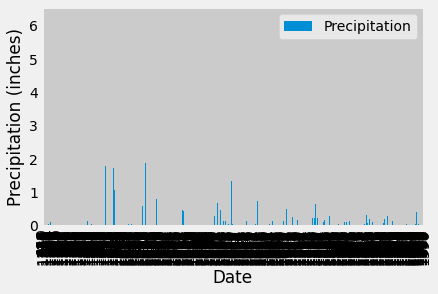

In [224]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results    
rain_query = session.query(Measurement.prcp,Measurement.date).filter(Measurement.date >= '2016-8-23').all()
df = pd.DataFrame(rain_query, columns = ['Precipitation','Date'])
df.sort_values(by=['Date'], inplace=True)
df.plot.bar()
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')


In [213]:
import datetime 
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
string_date = '2017-08-23'
format = '%Y-%m-%d'
datetime_object = datetime.datetime.strptime(string_date, format)

print(datetime_object)

tdelta = datetime.timedelta(days=365)

print(datetime_object - tdelta)




2017-08-23 00:00:00
2016-08-23 00:00:00


Text(9.310000000000002, 0.5, 'Precipitation (inches)')

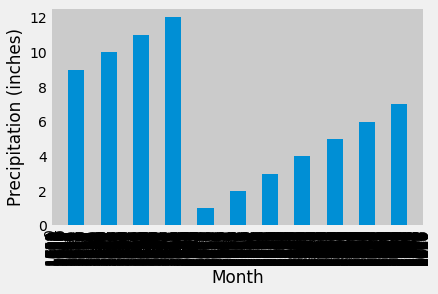

In [261]:
import datetime as dt
# Perform a query to retrieve the data and precipitation scores
new_date = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= '2016-08-23')
# Save the query results as a Pandas DataFrame and set the index to the date column
new_date_df = pd.DataFrame(new_date, columns=['Precipitation','Date'])
new_date_df.set_index('Date')
new_date_df.head()

# convert the 'Date' column to datetime format
new_date_df['Date']= pd.to_datetime(new_date_df['Date'])

# Sort the dataframe by date
new_date_df.sort_values(by=['Date'], inplace=True)
grouped_month = new_date_df["month"] = new_date_df["Date"].dt.month

# Use Pandas Plotting with Matplotlib to plot the data
grouped_month.plot.bar()
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)')


In [263]:
new_date_df.describe()

,Precipitation,month
count,2021.000000,2230.000000
mean,0.177279,6.539013
std,0.461190,3.487857
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.020000,7.000000
75%,0.130000,10.000000
max,6.700000,12.000000


In [220]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [221]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


9

In [ ]:
#joining tables

joined_table = session.query(Measurement, Station).join(Measurement.id == Station.id).limit(10).all()


In [268]:
# df.groupby("state")["last_name"].count()
new_date_df.head(20)

,Precipitation,Date,month
0,0.00,2016-08-23,8
1009,NaN,2016-08-23,8
1529,1.79,2016-08-23,8
704,0.05,2016-08-23,8
361,0.15,2016-08-23,8
1881,0.70,2016-08-23,8
1192,0.02,2016-08-23,8
1,0.08,2016-08-24,8
1530,2.15,2016-08-24,8
705,2.28,2016-08-24,8


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
